# Lab 3: Data Preprocessing and Clustering with Real-World Data using Pandas DataFrames

**Semester:** Fall 2025
**Institution:** FCIS Mansoura University

---

## Lab Objectives

Upon completion of this lab, students will be able to:

1. **Load and Explore Real Datasets**: Use pandas to load datasets from various sources and perform initial exploration
2. **Understand DataFrame Operations**: Master essential pandas operations including indexing, filtering, and data selection
3. **Preprocess Data for Clustering**: Handle missing values, encode categorical variables, and normalize features
4. **Apply Clustering to Real Data**: Use K-Means and SOM on real-world datasets with proper data preparation
5. **Visualize and Interpret Results**: Create meaningful visualizations to understand clustering patterns in real data
6. **Compare Clustering Algorithms**: Understand when to use K-Means vs SOM based on dataset characteristics

---

## Step 1: Import Required Libraries

First, let's import all necessary libraries for data manipulation, clustering, and visualization.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn_som.som import SOM

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---

## Step 2: Introduction to Pandas DataFrames

### What is a DataFrame?

A DataFrame is a 2-dimensional labeled data structure with columns that can be of different types. Think of it as a table in a spreadsheet or a SQL table.

**Key Characteristics:**
- Rows and columns with labels
- Columns can have different data types
- Size-mutable (can add/remove rows and columns)
- Powerful data manipulation methods

In [2]:
# Create a simple DataFrame example
sample_data = {
    'Name':  ['Ahmed', 'Fatima', 'Omar', 'Nour'],
    'Age':   [22,       21,       23,     22   ],
    'Grade': [85,       92,       78,     88   ]
}

df_sample = pd.DataFrame(sample_data)

print("Example DataFrame:")
print(df_sample)
print("\n" + "="*50)

# Basic DataFrame operations
print("\nDataFrame Shape (rows, columns):", df_sample.shape)
print("\nColumn Names:", df_sample.columns.tolist())
print("\nData Types:\n", df_sample.dtypes)
print("\n" + "="*50)

# Accessing data
print("\nAccessing 'Age' column:")
print(df_sample['Age'])
print("\n" + "="*50)

print("\nAccessing first 2 rows:")
print(df_sample.head(2))

Example DataFrame:
     Name  Age  Grade
0   Ahmed   22     85
1  Fatima   21     92
2    Omar   23     78
3    Nour   22     88


DataFrame Shape (rows, columns): (4, 3)

Column Names: ['Name', 'Age', 'Grade']

Data Types:
 Name     object
Age       int64
Grade     int64
dtype: object


Accessing 'Age' column:
0    22
1    21
2    23
3    22
Name: Age, dtype: int64


Accessing first 2 rows:
     Name  Age  Grade
0   Ahmed   22     85
1  Fatima   21     92


---

## Step 3: Load the Iris Dataset

The **Iris dataset** is a classic dataset in machine learning containing measurements of iris flowers from three different species:
- **Setosa**
- **Versicolor**
- **Virginica**

**Features:**
1. Sepal Length (cm)
2. Sepal Width (cm)
3. Petal Length (cm)
4. Petal Width (cm)

In [3]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the dataset
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column (species)
df_iris['species'] = iris.target

# Map numeric labels to actual species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['species_name'] = df_iris['species'].map(species_map)

print("Iris Dataset Loaded Successfully!")
print("\nDataset Shape:", df_iris.shape)
print("\nFirst 5 rows:")
print(df_iris.head())

Iris Dataset Loaded Successfully!

Dataset Shape: (150, 6)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [4]:
# Load the Iris dataset from CSV
# Option 1: From a local file
df_iris = pd.read_csv('iris.csv')

# Option 2: From a URL (online source)
# df_iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

print("Iris Dataset Loaded Successfully!")
print("\nDataset Shape:", df_iris.shape)
print("\nFirst 5 rows:")
print(df_iris.head())

# Check column names to see what we're working with
print("\nColumn names:", df_iris.columns.tolist())

# If the CSV has species names directly (like 'setosa', 'versicolor', 'virginica')
# You may need to rename columns to match what we use later
df_iris.columns = ['sepal length (cm)', 'sepal width (cm)',
                   'petal length (cm)', 'petal width (cm)', 'species_name']

# Create numeric species column for later use
species_map_reverse = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df_iris['species'] = df_iris['species_name'].map(species_map_reverse)

print("\nAfter renaming:")
print(df_iris.head())

Iris Dataset Loaded Successfully!

Dataset Shape: (150, 5)

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

After renaming:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6   

---

## Step 4: Exploratory Data Analysis (EDA)

### 4.1 Basic Information

In [5]:
print("="*60)
print("DATASET INFORMATION")
print("="*60)

print("\nBasic Statistics:")
print(df_iris.describe())

print("\n" + "="*60)
print("\nData Types:")
print(df_iris.dtypes)

print("\n" + "="*60)
print("\nMissing Values:")
print(df_iris.isnull().sum())

print("\n" + "="*60)
print("\nSpecies Distribution:")
print(df_iris['species_name'].value_counts())

DATASET INFORMATION

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Data Types:
sepal length (cm)  

### 4.2 Data Selection and Filtering

DataFrames provide powerful methods for selecting and filtering data.

In [6]:
# Select specific columns
print("Selecting only sepal measurements:")
sepal_data = df_iris[['sepal length (cm)', 'sepal width (cm)']]
print(sepal_data.head()) # 5 rows

print("\n" + "="*60)

# Filter rows based on condition
print("\nFiltering: Only Setosa species:")
setosa_only = df_iris[df_iris['species_name'] == 'setosa']
print(f"Number of Setosa samples: {len(setosa_only)}")
print(setosa_only.head())

print("\n" + "="*60)

# Multiple conditions
print("\nFiltering: Setosa with sepal length > 5.0:")
filtered_data = df_iris[(df_iris['species_name'] == 'setosa') & 
                        (df_iris['sepal length (cm)'] > 5.0)]
print(f"Number of matching samples: {len(filtered_data)}")
print(filtered_data.head())

Selecting only sepal measurements:
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6


Filtering: Only Setosa species:
Number of Setosa samples: 50
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species_name  species  
0       setosa        0  
1       setosa        0  
2       setosa        0  
3       setosa        0  
4       setosa        0  


Filtering: Setosa with sepal length

### 4.3 Visualizing the Data

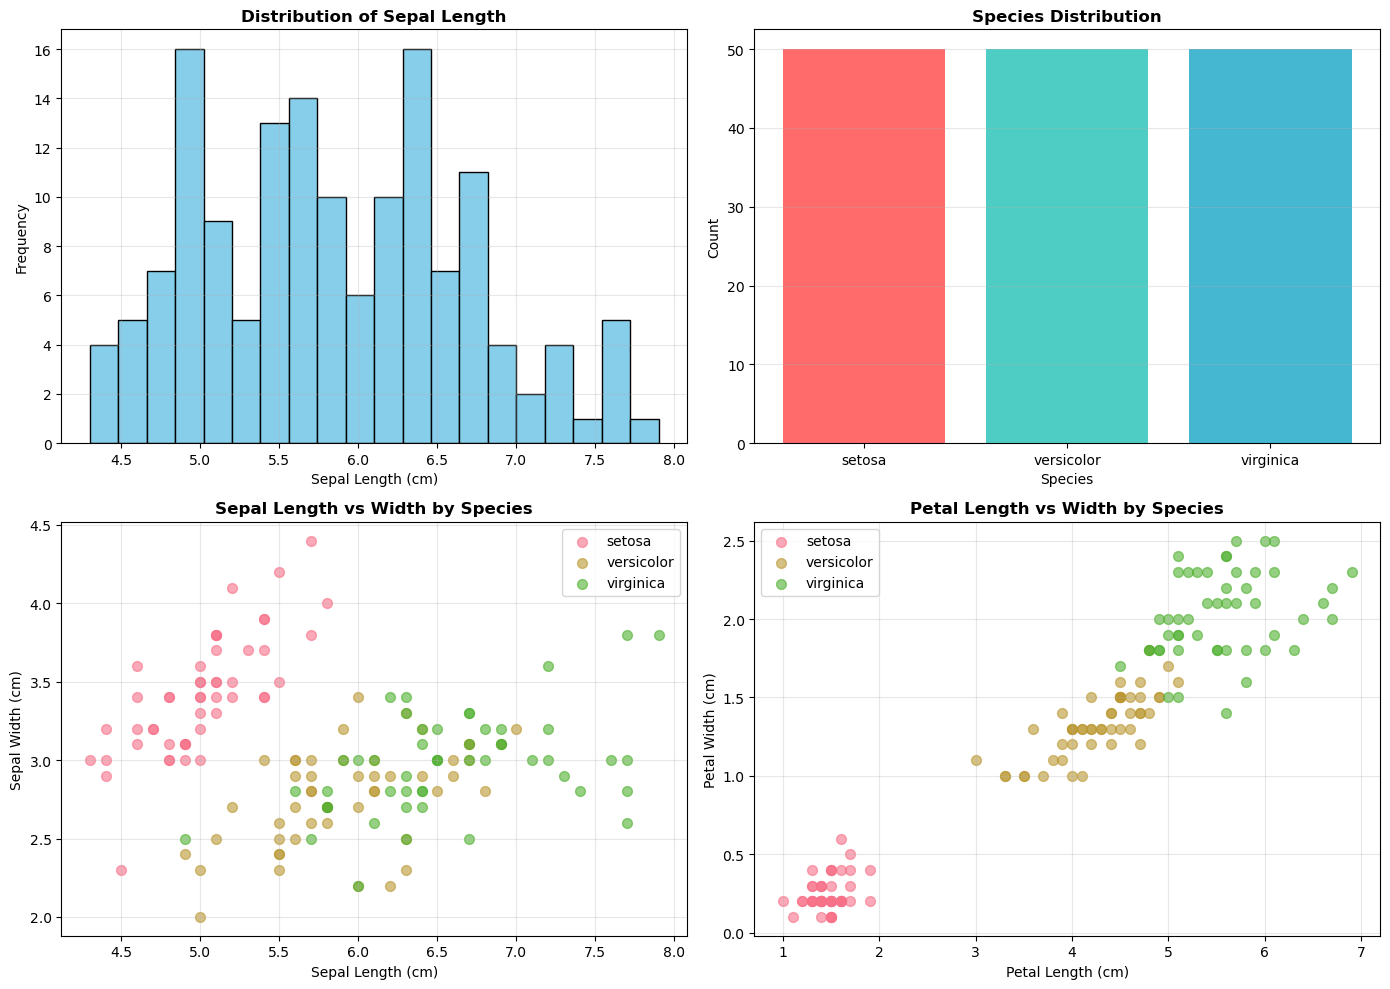

✓ Visualizations created successfully!


In [7]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#   0,0 | 0,1
#   1,0 | 1,1
#
# Plot 1: Distribution of sepal length
axes[0, 0].hist(df_iris['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Sepal Length', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Species count
species_counts = df_iris['species_name'].value_counts()
axes[0, 1].bar(species_counts.index, species_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('Species Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(alpha=0.3, axis='y')

# Plot 3: Scatter plot - Sepal measurements
for species in df_iris['species_name'].unique():
    species_data = df_iris[df_iris['species_name'] == species]
    axes[1, 0].scatter(species_data['sepal length (cm)'], 
                       species_data['sepal width (cm)'],
                       label=species, alpha=0.6, s=50)
axes[1, 0].set_title('Sepal Length vs Width by Species', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Scatter plot - Petal measurements
for species in df_iris['species_name'].unique():
    species_data = df_iris[df_iris['species_name'] == species]
    axes[1, 1].scatter(species_data['petal length (cm)'], 
                       species_data['petal width (cm)'],
                       label=species, alpha=0.6, s=50)
axes[1, 1].set_title('Petal Length vs Width by Species', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Petal Length (cm)')
axes[1, 1].set_ylabel('Petal Width (cm)')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizations created successfully!")

---

## Step 5: Data Preprocessing for Clustering

### 5.1 Feature Selection

In [8]:
# Select only the feature columns (exclude target variables)
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 
                   'petal length (cm)', 'petal width (cm)']

X = df_iris[feature_columns]

print("Selected Features for Clustering:")
print(X.head())
print("\nFeature Matrix Shape:", X.shape)

Selected Features for Clustering:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Feature Matrix Shape: (150, 4)


### 5.2 Feature Normalization

**Why normalize?** 

Different features may have different scales. For example:
- Sepal length: 4-8 cm
- Petal width: 0.1-2.5 cm

Clustering algorithms (especially those using distance measures) work better when features are on the same scale.

**StandardScaler** transforms features by:
- Subtracting the mean (centering)
- Dividing by standard deviation (scaling)

Formula: `z = (x - μ) / σ`

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("Original Data (first 5 rows):")
print(X.head())

print("\n" + "="*60)
print("\nScaled Data (first 5 rows):")
print(X_scaled_df.head())

print("\n" + "="*60)
print("\nOriginal Data Statistics:")
print(X.describe())

print("\n" + "="*60)
print("\nScaled Data Statistics (Notice mean ≈ 0, std ≈ 1):")
print(X_scaled_df.describe())

Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Scaled Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.032057          -1.341272         -1.312977
1          -1.143017         -0.124958          -1.341272         -1.312977
2          -1.385353          0.337848          -1.398138         -1.312977
3          -1.506521          0.106445          -1.284407         -1.312977
4          -1.021849          1.263460          -1.341272         -1.312977


Original Data Statistics:


---

## Step 6: Apply K-Means Clustering

### 6.1 Determine Optimal Number of Clusters

We'll use two methods:
1. **Elbow Method**: Look for the "elbow" in the WCSS plot
2. **Silhouette Score**: Higher scores indicate better clustering

In [10]:
# We'll use the Elbow Method to find optimal k
max_k = 10
wcss = []
silhouette_scores = []

print("Computing optimal number of clusters...")

# Explain when python take the last value and when it doesn't
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', 
                    max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"  k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={sil_score:.3f}")

print("\n✓ Optimization complete!")

Computing optimal number of clusters...
  k=2: WCSS=223.73, Silhouette=0.580
  k=3: WCSS=140.97, Silhouette=0.459
  k=4: WCSS=114.62, Silhouette=0.385
  k=5: WCSS=91.30, Silhouette=0.347
  k=6: WCSS=81.76, Silhouette=0.341
  k=7: WCSS=71.32, Silhouette=0.329
  k=8: WCSS=62.65, Silhouette=0.340
  k=9: WCSS=55.26, Silhouette=0.343
  k=10: WCSS=50.62, Silhouette=0.340

✓ Optimization complete!


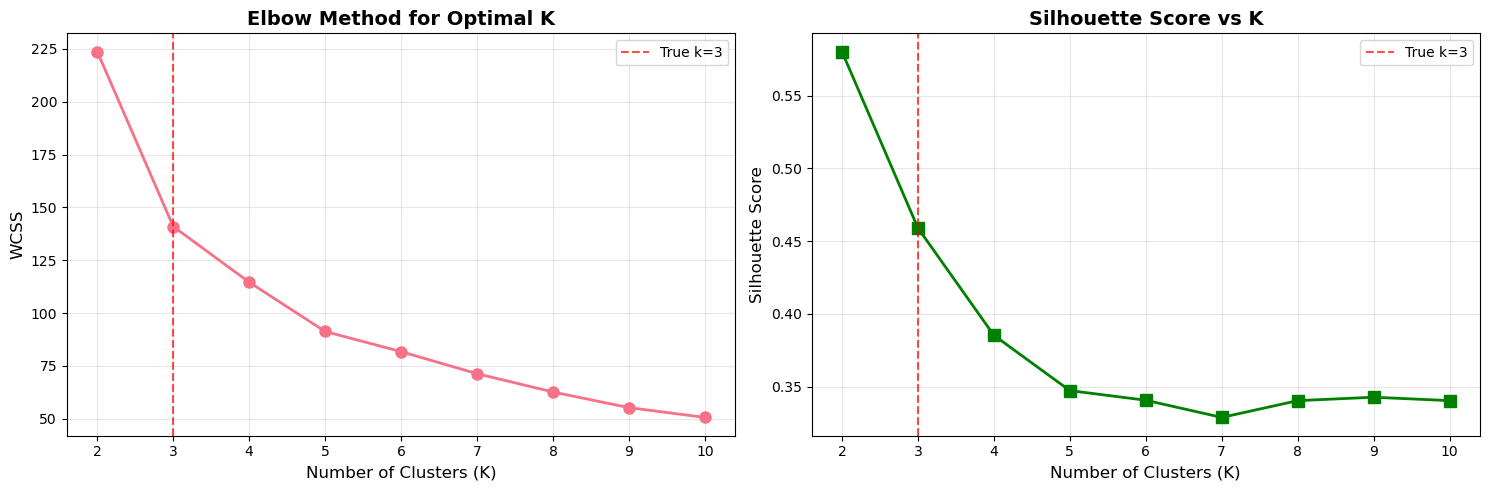


✓ Best k based on Silhouette Score: 2 (Score: 0.580)


In [26]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
ax1.plot(range(2, max_k + 1), wcss, marker='o', linewidth=2, markersize=8)
ax1.set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (K)', fontsize=12)
ax1.set_ylabel('WCSS', fontsize=12)
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='True k=3')
ax1.legend()
ax1.grid(alpha=0.3)

# Silhouette score plot
ax2.plot(range(2, max_k + 1), silhouette_scores, marker='s',
         linewidth=2, markersize=8, color='green')
ax2.set_title('Silhouette Score vs K', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='True k=3')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find best k
best_k_idx = np.argmax(silhouette_scores)
best_k = best_k_idx + 2
print(f"\n✓ Best k based on Silhouette Score: {best_k} (Score: {max(silhouette_scores):.3f})")

### 6.2 Train Final K-Means Model

In [12]:
# Train K-Means with optimal k=3
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', 
                      max_iter=300, n_init=10, random_state=42)

# Fit and predict
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# Add predictions to the DataFrame
df_iris['kmeans_cluster'] = kmeans_labels

print("K-Means Clustering Complete!")
print(f"\nCluster Distribution:")
print(df_iris['kmeans_cluster'].value_counts().sort_index())

print("\n" + "="*60)
print("\nSample predictions:")
print(df_iris[['species_name', 'kmeans_cluster']].head(10))

K-Means Clustering Complete!

Cluster Distribution:
kmeans_cluster
0    53
1    50
2    47
Name: count, dtype: int64


Sample predictions:
  species_name  kmeans_cluster
0       setosa               1
1       setosa               1
2       setosa               1
3       setosa               1
4       setosa               1
5       setosa               1
6       setosa               1
7       setosa               1
8       setosa               1
9       setosa               1


### 6.3 Visualize K-Means Results

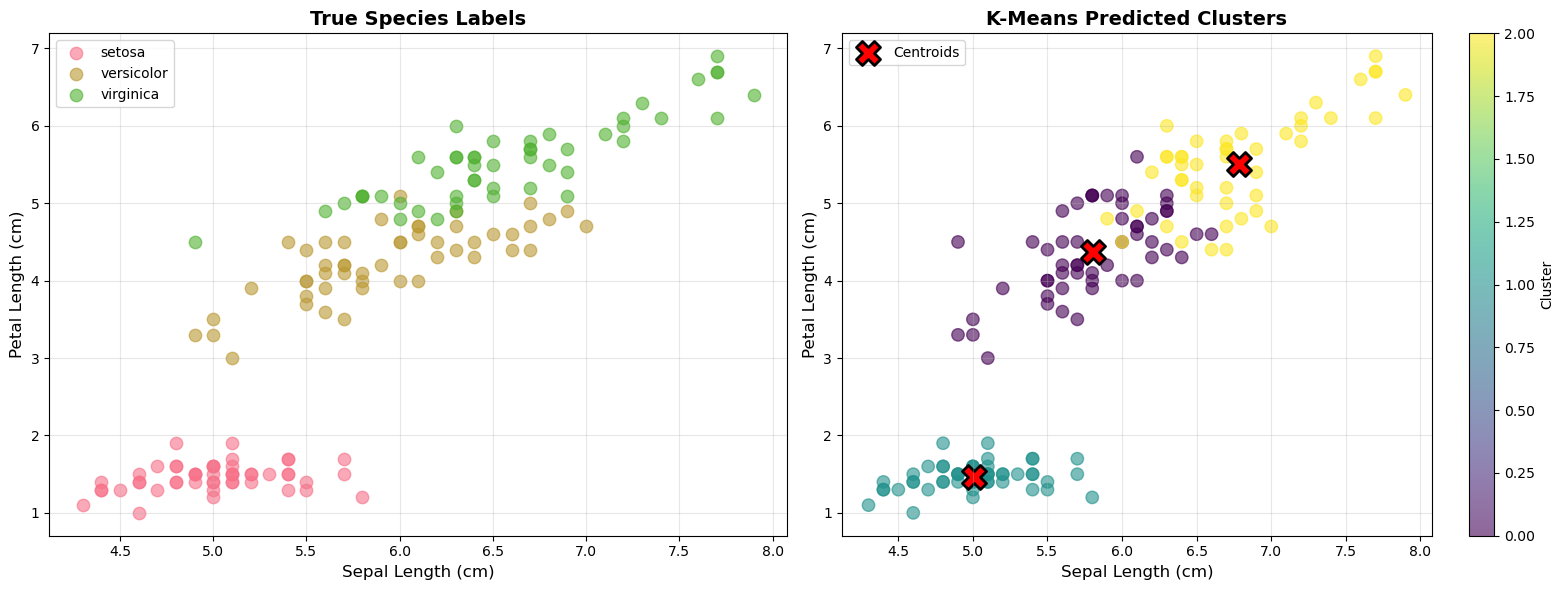


✓ Final K-Means Silhouette Score: 0.459


In [13]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: True Species
for species_idx, species in enumerate(['setosa', 'versicolor', 'virginica']):
    species_data = df_iris[df_iris['species_name'] == species]
    axes[0].scatter(species_data['sepal length (cm)'], 
                    species_data['petal length (cm)'],
                    label=species, alpha=0.6, s=80)

axes[0].set_title('True Species Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[0].set_ylabel('Petal Length (cm)', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: K-Means Clusters
scatter = axes[1].scatter(df_iris['sepal length (cm)'], 
                          df_iris['petal length (cm)'],
                          c=df_iris['kmeans_cluster'], 
                          cmap='viridis', alpha=0.6, s=80)

# Add centroids
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
axes[1].scatter(centroids_original[:, 0], centroids_original[:, 2],
                marker='X', s=300, c='red', edgecolor='black', 
                linewidth=2, label='Centroids')

axes[1].set_title('K-Means Predicted Clusters', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[1].set_ylabel('Petal Length (cm)', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

# Calculate and display performance
sil_score = silhouette_score(X_scaled, kmeans_labels)
print(f"\n✓ Final K-Means Silhouette Score: {sil_score:.3f}")

---

## Step 7: Apply Self-Organizing Maps (SOM)

### 7.1 Train SOM Model

We'll use the `sklearn_som` library which provides a scikit-learn compatible implementation of SOM.

**Parameters:**
- `m, n`: Grid dimensions (we'll use 3×1 for 3 clusters)
- `dim`: Number of input features (4 in our case)
- `lr`: Learning rate
- `max_iter`: Number of training iterations

In [14]:
# Initialize SOM with a 3x1 grid
# For 3 clusters, a smaller grid like 1x3 or 2x2 could also work
som_model = SOM(m=3, n=1, dim=4, lr=0.5, max_iter=1000, random_state=42)

print("Training Self-Organizing Map...")
print(f"  Grid size: 3×1")
print(f"  Input dimensions: 4 features")
print(f"  Learning rate: 0.5")
print(f"  Max iterations: 1000")

# Fit the model
som_model.fit(X_scaled)

# Predict cluster assignments
som_labels = som_model.predict(X_scaled)

# Add to DataFrame
df_iris['som_cluster'] = som_labels

print("\n✓ SOM Training Complete!")
print(f"\nCluster Distribution:")
print(df_iris['som_cluster'].value_counts().sort_index())

print("\n" + "="*60)
print("\nSample predictions:")
print(df_iris[['species_name', 'som_cluster']].head(10))

Training Self-Organizing Map...
  Grid size: 3×1
  Input dimensions: 4 features
  Learning rate: 0.5
  Max iterations: 1000

✓ SOM Training Complete!

Cluster Distribution:
som_cluster
0    70
1    30
2    50
Name: count, dtype: int64


Sample predictions:
  species_name  som_cluster
0       setosa            2
1       setosa            2
2       setosa            2
3       setosa            2
4       setosa            2
5       setosa            2
6       setosa            2
7       setosa            2
8       setosa            2
9       setosa            2


### 7.2 Visualize SOM Results

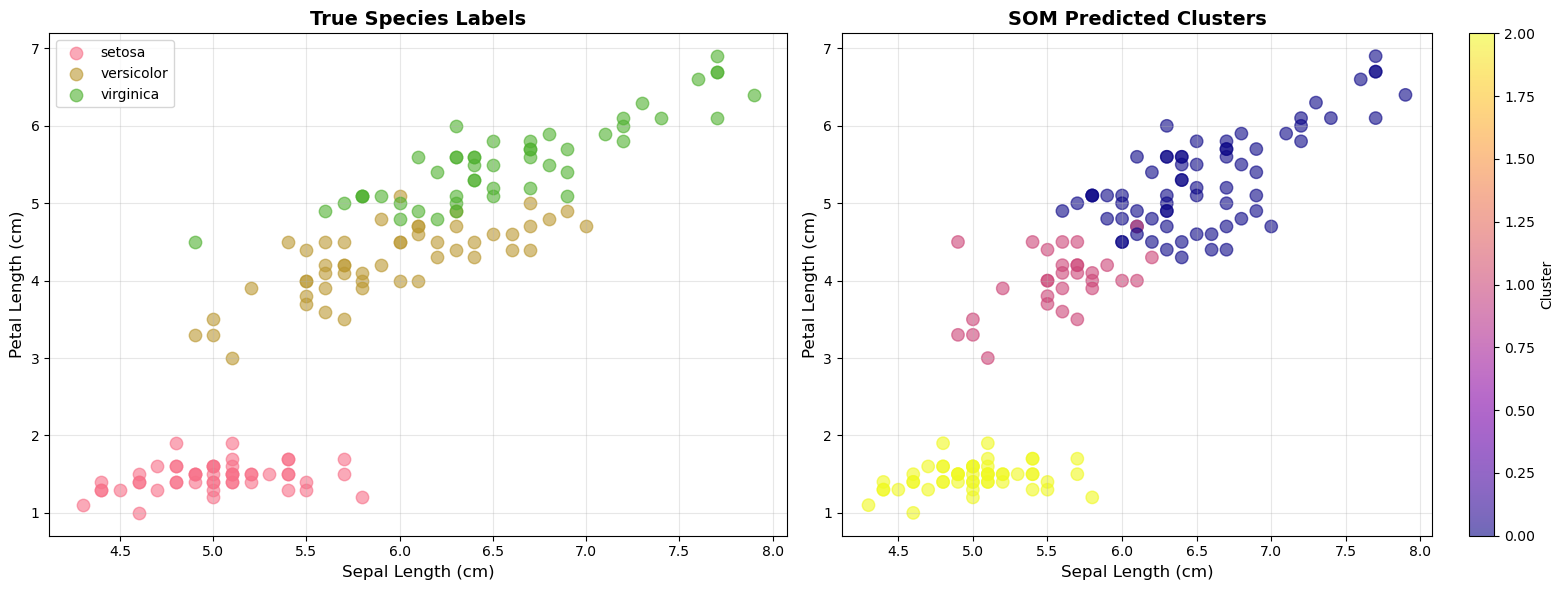


✓ SOM Silhouette Score: 0.412


In [15]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: True Species (for comparison)
for species in ['setosa', 'versicolor', 'virginica']:
    species_data = df_iris[df_iris['species_name'] == species]
    axes[0].scatter(species_data['sepal length (cm)'], 
                    species_data['petal length (cm)'],
                    label=species, alpha=0.6, s=80)

axes[0].set_title('True Species Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[0].set_ylabel('Petal Length (cm)', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: SOM Clusters
scatter = axes[1].scatter(df_iris['sepal length (cm)'], 
                          df_iris['petal length (cm)'],
                          c=df_iris['som_cluster'], 
                          cmap='plasma', alpha=0.6, s=80)

axes[1].set_title('SOM Predicted Clusters', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sepal Length (cm)', fontsize=12)
axes[1].set_ylabel('Petal Length (cm)', fontsize=12)
axes[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

# Calculate performance
som_sil_score = silhouette_score(X_scaled, som_labels)
print(f"\n✓ SOM Silhouette Score: {som_sil_score:.3f}")

---

## Step 8: Compare K-Means vs SOM

### 8.1 Comparison Table

In [16]:
# Create comparison DataFrame
comparison_df = df_iris[['species_name', 'species', 'kmeans_cluster', 'som_cluster']].copy()

print("="*60)
print("CLUSTERING COMPARISON")
print("="*60)

print("\nFirst 15 samples:")
print(comparison_df.head(15))

print("\n" + "="*60)
print("\nCluster Distribution Comparison:")
print("\nTrue Species:")
print(df_iris['species_name'].value_counts().sort_index())

print("\nK-Means Clusters:")
print(df_iris['kmeans_cluster'].value_counts().sort_index())

print("\nSOM Clusters:")
print(df_iris['som_cluster'].value_counts().sort_index())

CLUSTERING COMPARISON

First 15 samples:
   species_name  species  kmeans_cluster  som_cluster
0        setosa        0               1            2
1        setosa        0               1            2
2        setosa        0               1            2
3        setosa        0               1            2
4        setosa        0               1            2
5        setosa        0               1            2
6        setosa        0               1            2
7        setosa        0               1            2
8        setosa        0               1            2
9        setosa        0               1            2
10       setosa        0               1            2
11       setosa        0               1            2
12       setosa        0               1            2
13       setosa        0               1            2
14       setosa        0               1            2


Cluster Distribution Comparison:

True Species:
species_name
setosa        50
versicolor    5

### 8.2 Cross-Tabulation Analysis

Cross-tabulation helps us see how well each clustering algorithm recovered the true species structure.

In [17]:
# Create cross-tabulation tables
print("\n" + "="*60)
print("K-MEANS: Species vs Predicted Clusters")
print("="*60)
kmeans_crosstab = pd.crosstab(df_iris['species_name'], 
                                df_iris['kmeans_cluster'],
                                margins=True)
print(kmeans_crosstab)

print("\n" + "="*60)
print("SOM: Species vs Predicted Clusters")
print("="*60)
som_crosstab = pd.crosstab(df_iris['species_name'], 
                            df_iris['som_cluster'],
                            margins=True)
print(som_crosstab)

# Performance comparison
print("\n" + "="*60)
print("PERFORMANCE METRICS")
print("="*60)
print(f"K-Means Silhouette Score: {sil_score:.3f}")
print(f"SOM Silhouette Score:     {som_sil_score:.3f}")
print(f"\nBetter performing model: {'K-Means' if sil_score > som_sil_score else 'SOM'}")


K-MEANS: Species vs Predicted Clusters
kmeans_cluster   0   1   2  All
species_name                   
setosa           0  50   0   50
versicolor      39   0  11   50
virginica       14   0  36   50
All             53  50  47  150

SOM: Species vs Predicted Clusters
som_cluster    0   1   2  All
species_name                 
setosa         0   0  50   50
versicolor    21  29   0   50
virginica     49   1   0   50
All           70  30  50  150

PERFORMANCE METRICS
K-Means Silhouette Score: 0.459
SOM Silhouette Score:     0.412

Better performing model: K-Means


### 8.3 Side-by-Side Visualization

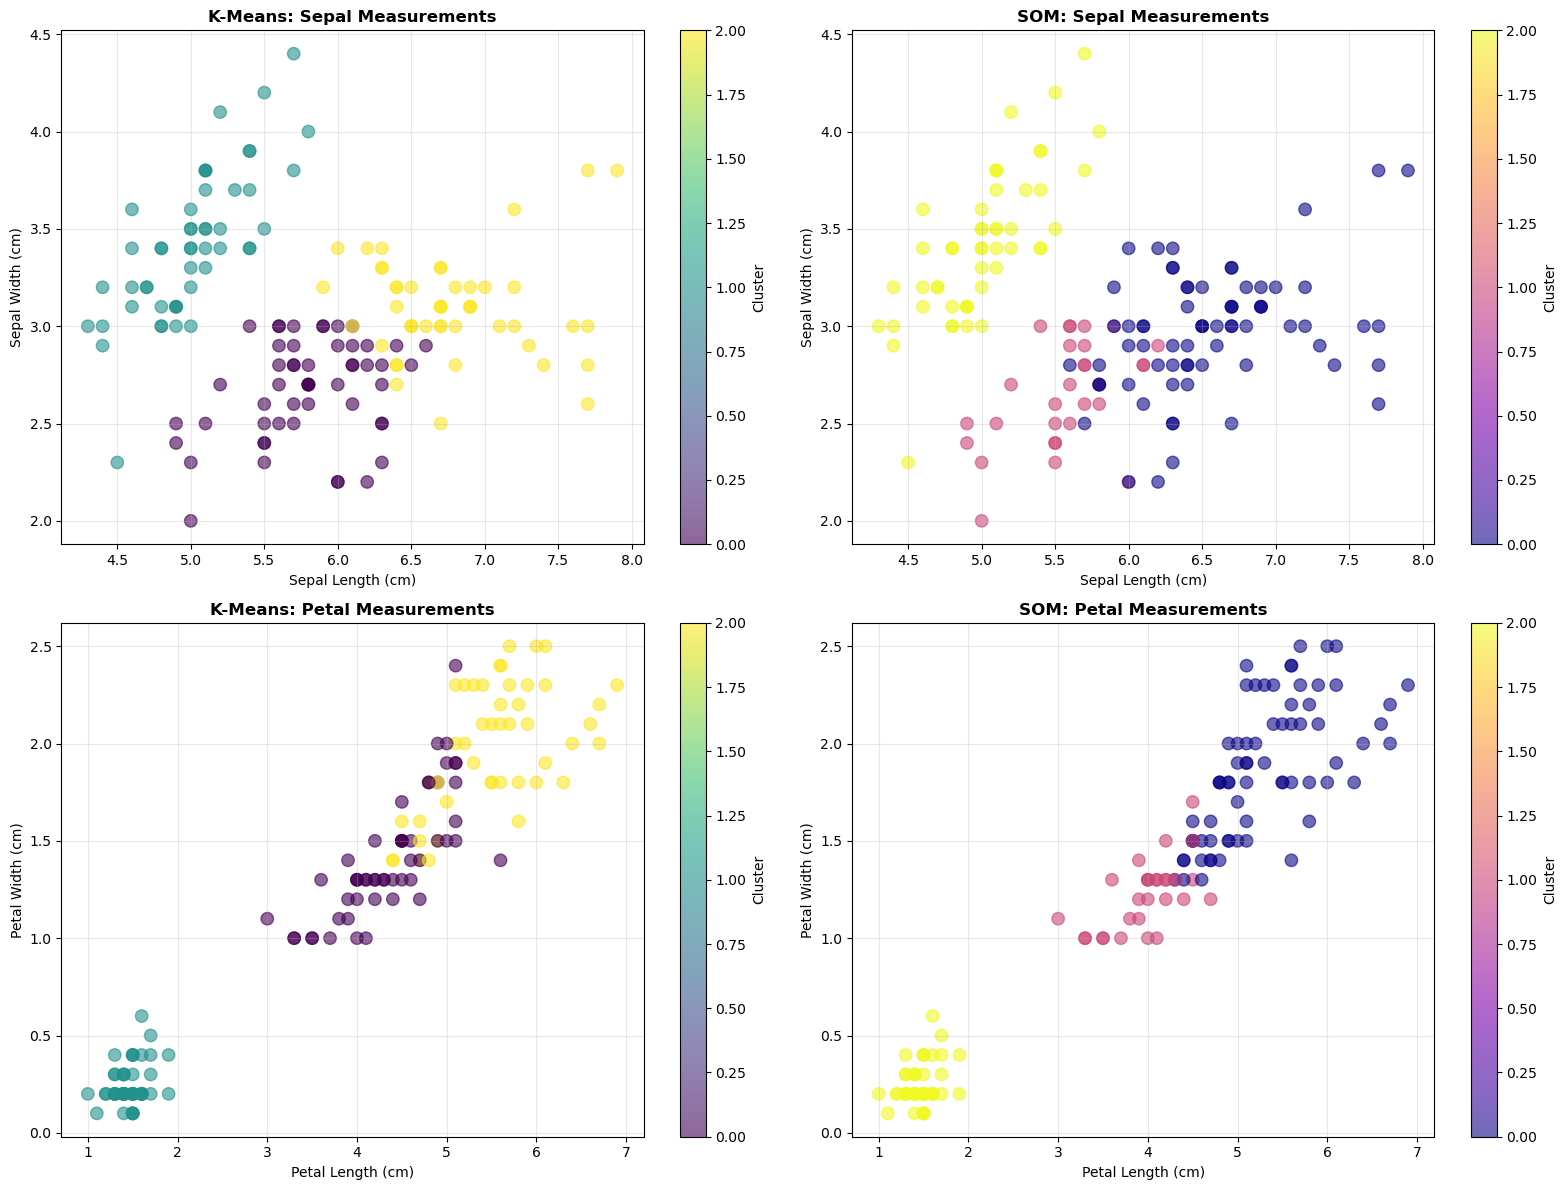

✓ Comprehensive comparison visualizations created!


In [18]:
# Create comprehensive comparison plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#   0,0 | 0,1
#   1,0 | 1,1
# Sepal measurements - K-Means
scatter1 = axes[0, 0].scatter(df_iris['sepal length (cm)'], 
                               df_iris['sepal width (cm)'],
                               c=df_iris['kmeans_cluster'], 
                               cmap='viridis', alpha=0.6, s=80)
axes[0, 0].set_title('K-Means: Sepal Measurements', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0, 0], label='Cluster')

# Sepal measurements - SOM
scatter2 = axes[0, 1].scatter(df_iris['sepal length (cm)'], 
                               df_iris['sepal width (cm)'],
                               c=df_iris['som_cluster'], 
                               cmap='plasma', alpha=0.6, s=80)
axes[0, 1].set_title('SOM: Sepal Measurements', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sepal Length (cm)')
axes[0, 1].set_ylabel('Sepal Width (cm)')
axes[0, 1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[0, 1], label='Cluster')

# Petal measurements - K-Means
scatter3 = axes[1, 0].scatter(df_iris['petal length (cm)'], 
                               df_iris['petal width (cm)'],
                               c=df_iris['kmeans_cluster'], 
                               cmap='viridis', alpha=0.6, s=80)
axes[1, 0].set_title('K-Means: Petal Measurements', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Petal Width (cm)')
axes[1, 0].grid(alpha=0.3)
plt.colorbar(scatter3, ax=axes[1, 0], label='Cluster')

# Petal measurements - SOM
scatter4 = axes[1, 1].scatter(df_iris['petal length (cm)'], 
                               df_iris['petal width (cm)'],
                               c=df_iris['som_cluster'], 
                               cmap='plasma', alpha=0.6, s=80)
axes[1, 1].set_title('SOM: Petal Measurements', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Petal Length (cm)')
axes[1, 1].set_ylabel('Petal Width (cm)')
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter4, ax=axes[1, 1], label='Cluster')

plt.tight_layout()
plt.show()

print("✓ Comprehensive comparison visualizations created!")

---

## Step 9: Working with DataFrames - Advanced Operations

### 9.1 Grouping and Aggregation

Grouping allows us to perform operations on subsets of data.

In [19]:
print("="*60)
print("GROUPING AND AGGREGATION")
print("="*60)

# Group by species and calculate mean values
species_means = df_iris.groupby('species_name')[feature_columns].mean()
print("\nMean values by species:")
print(species_means)

print("\n" + "="*60)

# Group by K-Means cluster and calculate mean values
kmeans_cluster_means = df_iris.groupby('kmeans_cluster')[feature_columns].mean()
print("\nMean values by K-Means cluster:")
print(kmeans_cluster_means)

print("\n" + "="*60)

# Multiple aggregations
cluster_stats = df_iris.groupby('kmeans_cluster')[feature_columns].agg(['mean', 'std', 'min', 'max'])
print("\nDetailed statistics by K-Means cluster:")
print(cluster_stats)

GROUPING AND AGGREGATION

Mean values by species:
              sepal length (cm)  sepal width (cm)  petal length (cm)  \
species_name                                                           
setosa                    5.006             3.418              1.464   
versicolor                5.936             2.770              4.260   
virginica                 6.588             2.974              5.552   

              petal width (cm)  
species_name                    
setosa                   0.244  
versicolor               1.326  
virginica                2.026  


Mean values by K-Means cluster:
                sepal length (cm)  sepal width (cm)  petal length (cm)  \
kmeans_cluster                                                           
0                        5.801887          2.673585           4.369811   
1                        5.006000          3.418000           1.464000   
2                        6.780851          3.095745           5.510638   

                pet

### 9.2 Creating New Columns

We can create derived features based on existing columns.

In [20]:
# Create new derived features
df_iris['sepal_area'] = df_iris['sepal length (cm)'] * df_iris['sepal width (cm)']
df_iris['petal_area'] = df_iris['petal length (cm)'] * df_iris['petal width (cm)']
df_iris['sepal_to_petal_ratio'] = df_iris['sepal_area'] / df_iris['petal_area']

print("New derived features created:")
print(df_iris[['sepal_area', 'petal_area', 'sepal_to_petal_ratio']].head(10))

print("\n" + "="*60)
print("\nStatistics of derived features by species:")
print(df_iris.groupby('species_name')[['sepal_area', 'petal_area', 'sepal_to_petal_ratio']].mean())

New derived features created:
   sepal_area  petal_area  sepal_to_petal_ratio
0       17.85        0.28             63.750000
1       14.70        0.28             52.500000
2       15.04        0.26             57.846154
3       14.26        0.30             47.533333
4       18.00        0.28             64.285714
5       21.06        0.68             30.970588
6       15.64        0.42             37.238095
7       17.00        0.30             56.666667
8       12.76        0.28             45.571429
9       15.19        0.15            101.266667


Statistics of derived features by species:
              sepal_area  petal_area  sepal_to_petal_ratio
species_name                                              
setosa           17.2088      0.3628             57.443120
versicolor       16.5262      5.7204              2.970577
virginica        19.6846     11.2962              1.765114


### 9.3 Saving Results

We can save our results to a CSV file for later use.

In [21]:
# Save the results to a CSV file
output_file = 'iris_clustering_results.csv'
df_iris.to_csv(output_file, index=False)

print(f"\n✓ Results saved to '{output_file}'")

# Demonstrate how to read it back
print("\nTo read the file later, use:")
print("df_loaded = pd.read_csv('iris_clustering_results.csv')")
print("\nExample of loaded data:")
df_loaded = pd.read_csv(output_file)
print(df_loaded.head())


✓ Results saved to 'iris_clustering_results.csv'

To read the file later, use:
df_loaded = pd.read_csv('iris_clustering_results.csv')

Example of loaded data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species_name  species  kmeans_cluster  som_cluster  sepal_area  petal_area  \
0       setosa        0               1            2       17.85        0.28   
1       setosa        0               1            2       14.70        0.28   
2       setosa        0               1            2       15.04        0.26   
3       setosa        0               1      

---

## Step 10: Summary and Key Takeaways

In [22]:
print("="*70)
print(" "*15 + "LAB SUMMARY AND KEY TAKEAWAYS")
print("="*70)

print("\n📊 DATASET OVERVIEW:")
print(f"   • Dataset: Iris Flower Dataset")
print(f"   • Samples: {len(df_iris)} flowers")
print(f"   • Features: {len(feature_columns)} measurements")
print(f"   • True Classes: 3 species")

print("\n🔧 DATA PREPROCESSING:")
print(f"   • Feature selection using DataFrame column indexing")
print(f"   • Standardization using StandardScaler")
print(f"   • Missing values: None detected")

print("\n🎯 K-MEANS CLUSTERING:")
print(f"   • Optimal k: {optimal_k} (determined by Elbow Method)")
print(f"   • Silhouette Score: {sil_score:.3f}")
print(f"   • Cluster sizes: {df_iris['kmeans_cluster'].value_counts().sort_index().tolist()}")

print("\n🗺️ SELF-ORGANIZING MAPS:")
print(f"   • Grid size: 3×1")
print(f"   • Silhouette Score: {som_sil_score:.3f}")
print(f"   • Cluster sizes: {df_iris['som_cluster'].value_counts().sort_index().tolist()}")

print("\n📈 PERFORMANCE COMPARISON:")
print(f"   • Best model: {'K-Means' if sil_score > som_sil_score else 'SOM'}")
print(f"   • Score difference: {abs(sil_score - som_sil_score):.3f}")

print("\n💡 KEY LEARNINGS:")
print("   ✓ DataFrames provide powerful data manipulation capabilities")
print("   ✓ Feature scaling is crucial for distance-based algorithms")
print("   ✓ Both K-Means and SOM can identify natural groupings in data")
print("   ✓ Visualization helps validate clustering results")
print("   ✓ Real-world data requires careful preprocessing")

print("\n" + "="*70)

               LAB SUMMARY AND KEY TAKEAWAYS

📊 DATASET OVERVIEW:
   • Dataset: Iris Flower Dataset
   • Samples: 150 flowers
   • Features: 4 measurements
   • True Classes: 3 species

🔧 DATA PREPROCESSING:
   • Feature selection using DataFrame column indexing
   • Standardization using StandardScaler
   • Missing values: None detected

🎯 K-MEANS CLUSTERING:
   • Optimal k: 3 (determined by Elbow Method)
   • Silhouette Score: 0.459
   • Cluster sizes: [53, 50, 47]

🗺️ SELF-ORGANIZING MAPS:
   • Grid size: 3×1
   • Silhouette Score: 0.412
   • Cluster sizes: [70, 30, 50]

📈 PERFORMANCE COMPARISON:
   • Best model: K-Means
   • Score difference: 0.047

💡 KEY LEARNINGS:
   ✓ DataFrames provide powerful data manipulation capabilities
   ✓ Feature scaling is crucial for distance-based algorithms
   ✓ Both K-Means and SOM can identify natural groupings in data
   ✓ Visualization helps validate clustering results
   ✓ Real-world data requires careful preprocessing



---

## Exercise Questions

Answer the following questions based on your results:

### 1. DataFrame Operations:
- **Q1.1:** How would you filter the DataFrame to show only flowers with petal length > 4.5 cm?
- **Q1.2:** Create a new column called `total_size` that is the sum of all four measurements.

### 2. Data Exploration:
- **Q2.1:** Which species has the largest average petal area?
- **Q2.2:** Use `groupby()` to find the maximum sepal length for each K-Means cluster.

### 3. Clustering Analysis:
- **Q3.1:** What happens if you change the number of K-Means clusters to 2 or 4?
- **Q3.2:** Try training SOM with a different grid size (e.g., 2×2). How do the results change?

### 4. Feature Engineering:
- **Q4.1:** Create a new feature: `petal_sepal_length_ratio = petal length / sepal length`
- **Q4.2:** Re-run K-Means with this new feature included. Does it improve the Silhouette Score?

### 5. Comparison:
- **Q5.1:** When would you prefer K-Means over SOM?
- **Q5.2:** When would SOM be more appropriate?

In [23]:
# Exercise Solutions - Try to solve before running!

# Q1.1: Filter flowers with petal length > 4.5
# large_petals = df_iris[df_iris['petal length (cm)'] > 4.5]
# print(large_petals)

# Q1.2: Create total_size column
# df_iris['total_size'] = df_iris[feature_columns].sum(axis=1)
# print(df_iris[['species_name', 'total_size']].head())

# Q2.1: Species with largest average petal area
# print(df_iris.groupby('species_name')['petal_area'].mean())

# Q2.2: Maximum sepal length by cluster
# print(df_iris.groupby('kmeans_cluster')['sepal length (cm)'].max())

---

## Conclusion

In this lab, you learned:

1. ✅ How to work with pandas DataFrames for data manipulation
2. ✅ Essential preprocessing steps for clustering algorithms
3. ✅ How to apply K-Means and SOM to real-world data
4. ✅ Techniques for evaluating and visualizing clustering results
5. ✅ How to compare different clustering algorithms

**Remember:** The key to successful clustering is:
- Understanding your data through EDA "Exploratory Data Analysis"
- Proper preprocessing (scaling, handling missing values)
- Choosing appropriate evaluation metrics
- Visualizing results to validate findings

